# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [5]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [6]:
data = pd.read_csv('crime_data.csv')
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
#Renaming the Unnamed: 0 Column into States
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Descriptive Statistics

In [8]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Missing Values

In [10]:
null_count_col = data.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:\n\n", null_count_col, "\n")
null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")

Null Count for Columns:

 0    5
dtype: int64 

Null Count for Rows:

 0    50
dtype: int64 



Duplicated Values

In [11]:
data.duplicated().sum()

0

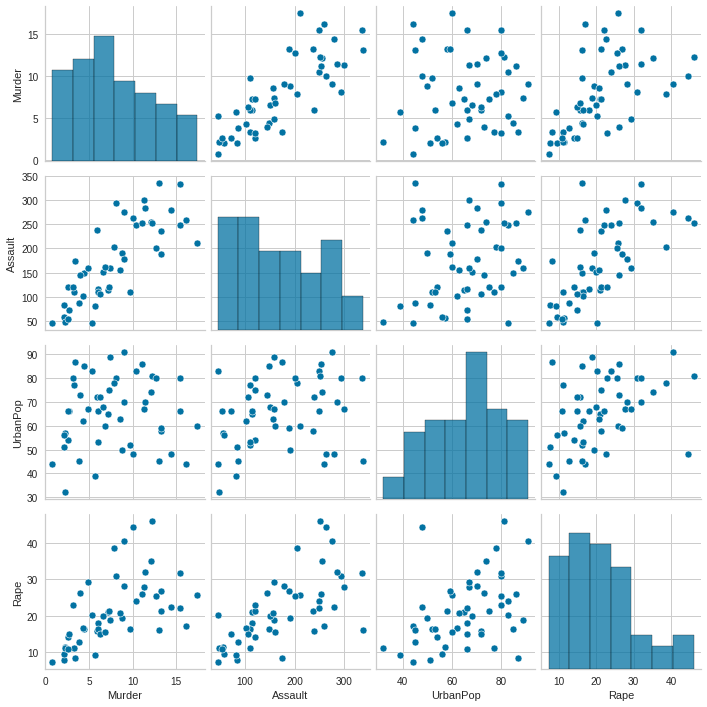

In [12]:
sns.pairplot(data)

Standardizing the Data

In [13]:
df = data.set_index('States')
df.head()


,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [16]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

Normalizing the data

In [14]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

K-Mean clustering

In [17]:
#Standard Scaler Applied on Data
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.672852
4,5,49.969203
5,6,44.546118
6,7,39.159790
7,8,36.082508
8,9,31.651878
9,10,28.385496


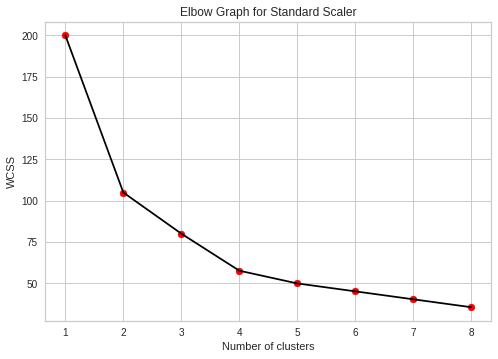

In [18]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#There is no clear "elbow" visible. A choice of 4 or 5 clusters seems to be fair. Let's see the silhouette score.

Elbow Plot for Standard Scaler data


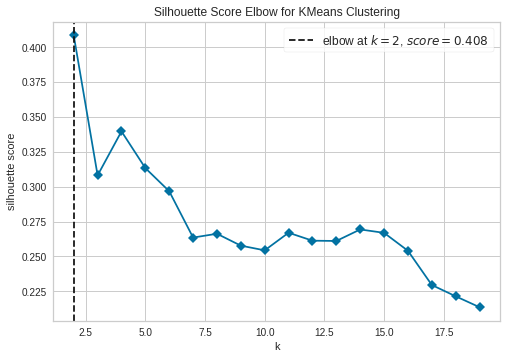

In [19]:
# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [20]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


Build KMeans Cluster algorithm using K=3 

In [21]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [22]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [23]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [24]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [25]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

80.0888613219962

In [26]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [27]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


Build KMeans Cluster algorithm using K=2

In [28]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape


(50,)

In [29]:
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [31]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

6.596893867946196

In [32]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [33]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


Hierarchical Clustering Algorithm

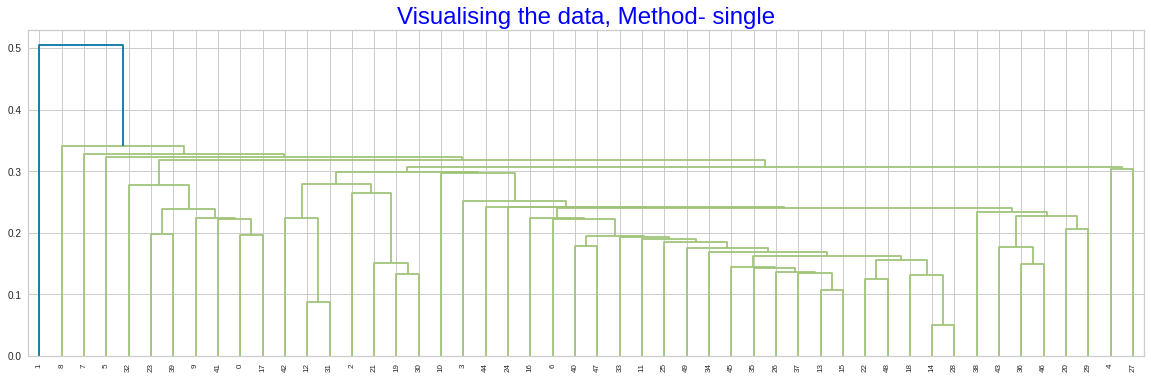

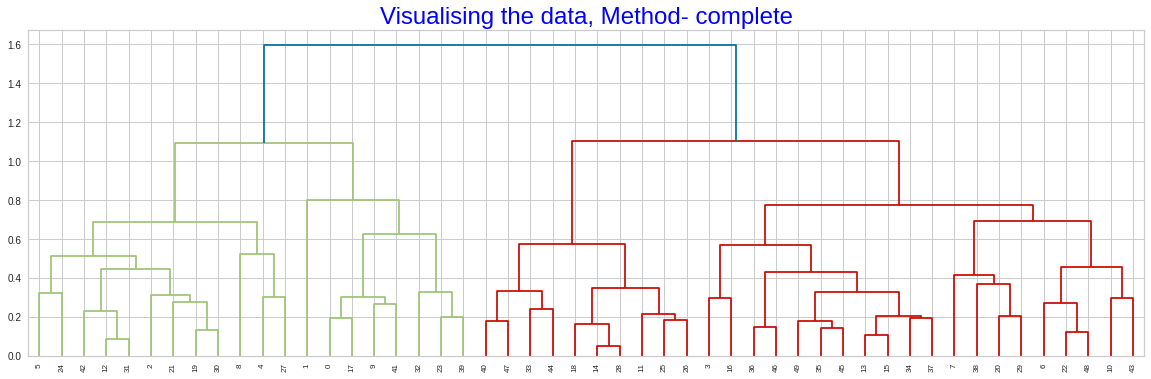

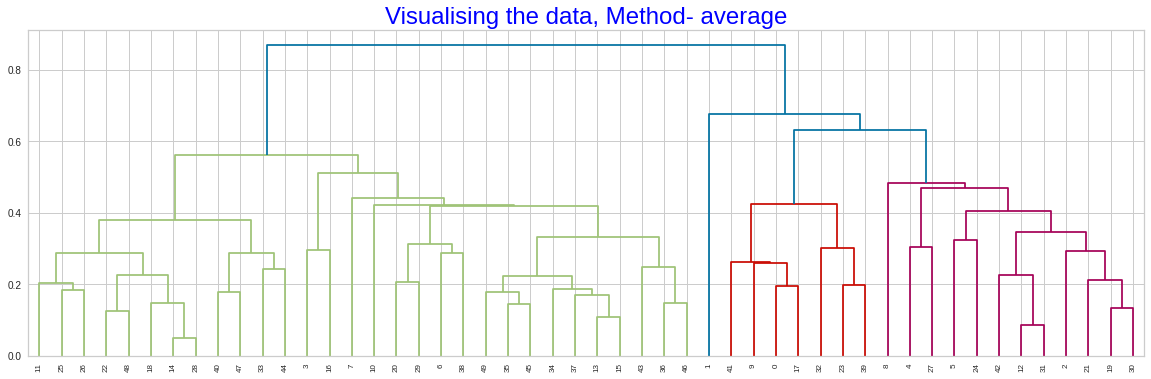

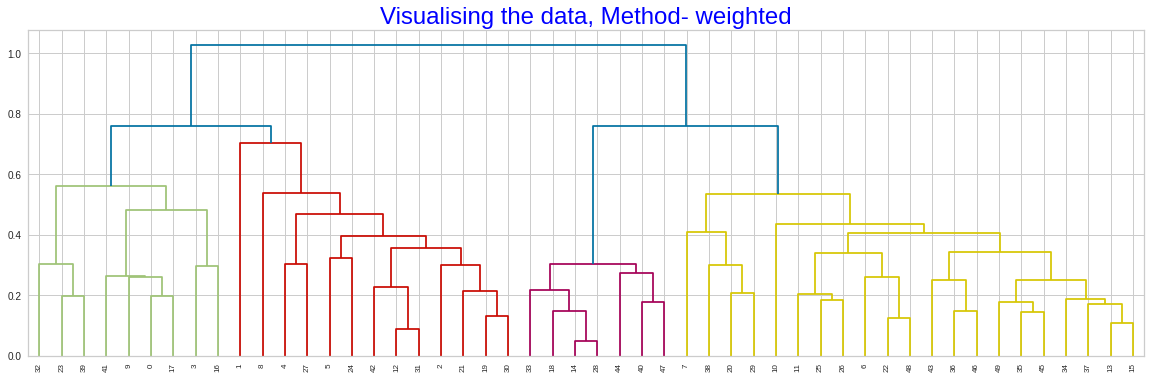

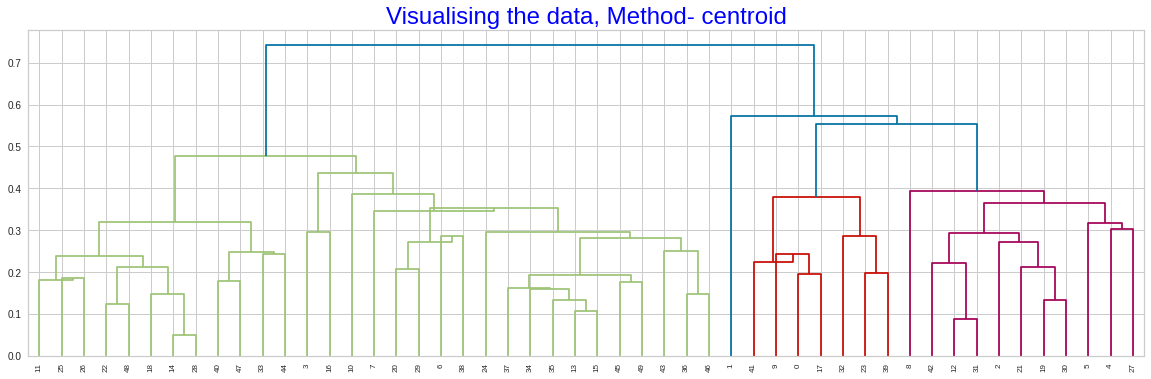

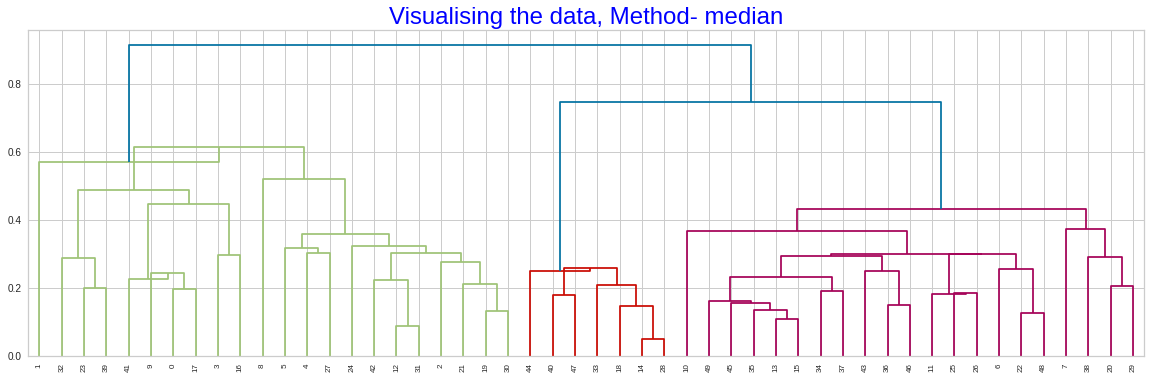

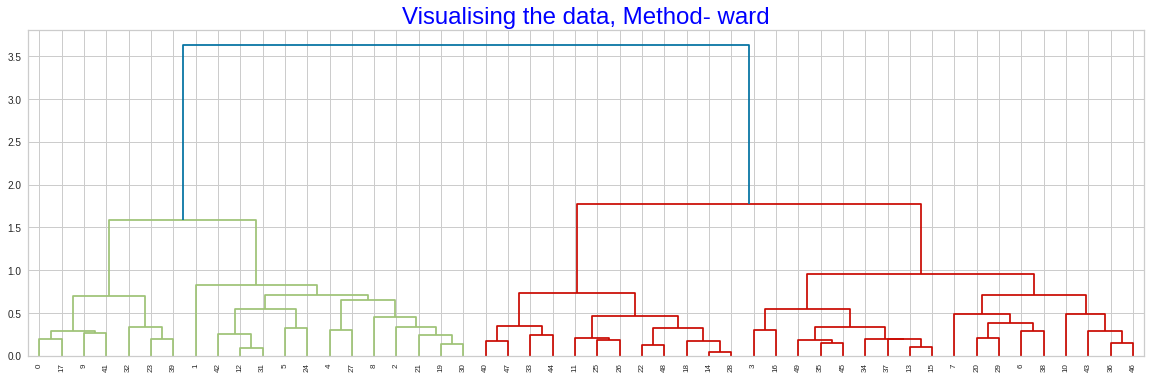

In [34]:
#Dendogram on MinMaxScaler Applied on Dataset
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [36]:
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

In [37]:
#Dendrogram on Standard Scaler Applied on Data
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

Run Hierarchical Clustering.(Agglomerative Clustering)

In [38]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [39]:
agg_clustering.n_clusters_

2

In [40]:
# Clustering Score

(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

In [41]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_

In [42]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


DBSCAN

In [43]:
#DBSCAN of Standard Scaled Data
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [44]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))


A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


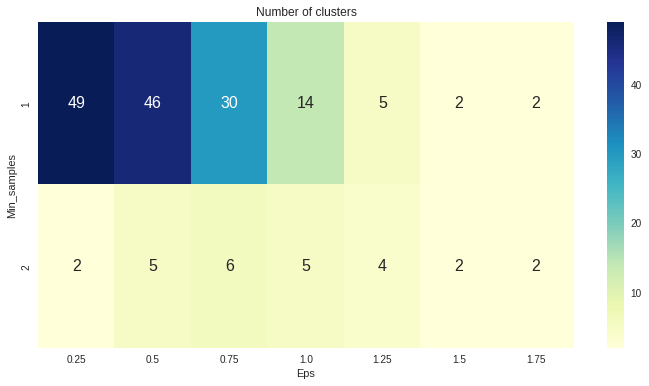

In [45]:
#Collecting number of generated clusters.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()


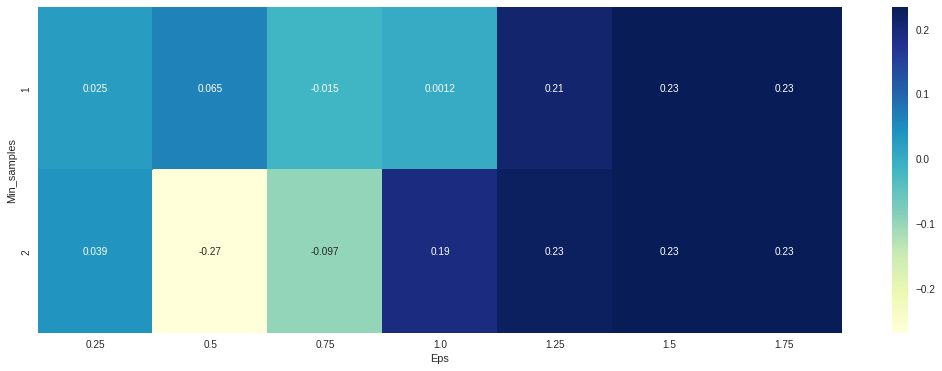

In [46]:
#As the heatplot above shows, the number of clusters vary from 49 to 2.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()


In [47]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [48]:
#Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [49]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [50]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()


,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [51]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [52]:
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


In [53]:
#DBSCAN on MinMax Scaled Data
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [54]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))


A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


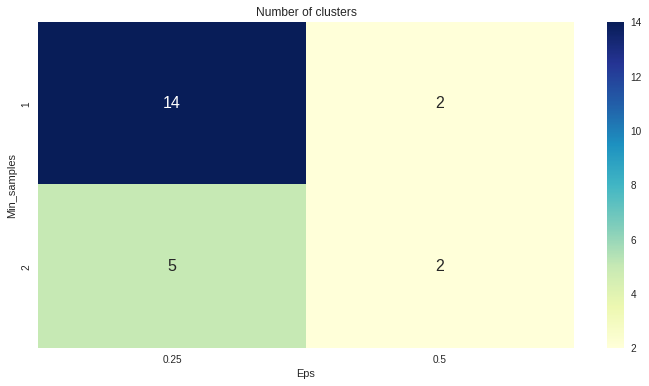

In [55]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

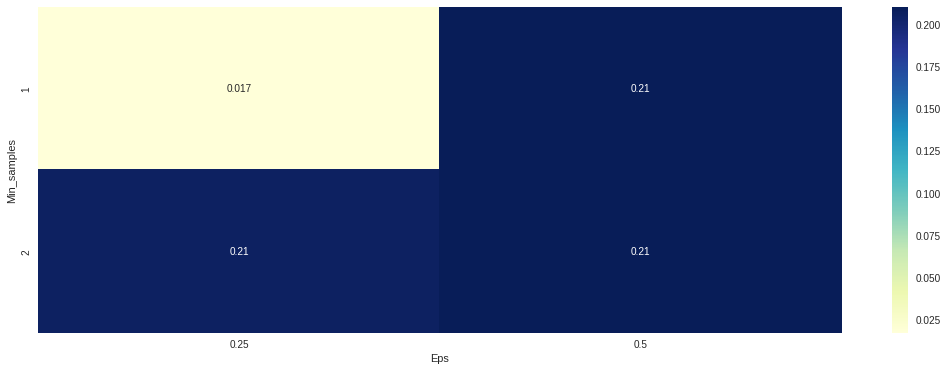

In [56]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()


In [57]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [58]:
#Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [59]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [60]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [61]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [62]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [63]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,0.387755,1.0
Hierarchical_labels,0.387755,1.0
DBSCAN_labels,0.000000,1.0
